# Experiment 9: Program to implement Divisive Clustering Algorithm

## Preprocessing

In [1]:
import distance
import time
import numpy as np

In [2]:
def distance_matrix():
    global dist
    for i in range(0,count+1):
        for j in range(0,i):
            if i!=j:
                dist[i][j]=distance.levenshtein(seq[i],seq[j])
                dist[j][i]=dist[i][j]
                values.insert(i,dist[i][j])
    values.sort()
    return dist

In [3]:
def preprocess():
    global count
    t=len(lines)
    for i in range(len(lines)):
        line=lines[i]
        if line[0]=='>':
            r=""
            i+=1
            line=lines[i]
            while(line[0]!='>'):
                r+=line
                i+=1
                if i < t: 
                    line=lines[i]
                else:
                    break
            count+=1
            seq[count]=r

In [4]:
f=open("data.txt","r").read()
h=open("edited.txt","w")

In [5]:
lines=f.splitlines()
seq=dict()
values=list()

In [12]:
lines

['>chr10_1000',
 'MAQTRYTQNRWRNEACREKALSTCGCSANVSQPTITTLLTPLTSETTPLREILVVSLKRK',
 'GSDDVRHAIKDNNTLCPFVILKEPINAPSLVCHLHKSCCRHRQLQRSLRLKNYLECYTS*',
 '>chr10_125',
 'MELRALEADLNFLSVILFATFIFSLPLRLLIVIFQRYWAPASTLPPCISQKQPQDTSRLT',
 'NTTSISDEESTANGNLCLSILKILAGLFQAASSSLRIMVMCHF*',
 '>chr10_1324',
 'MEEFIAQKIPFCYLIQKVQSPQLRKIYFPHFNTLQNSPHNSSECVKHSFIRSETNFDVVA',
 'AIIPILCLCYGFNHFLYAFCSSDQGETPDRQRGYQGNHFYLECGEKSN*',
 '>chr10_150',
 'MRCPKSAVTMRNEELLLSMIKSCFESTIASRDLRLEFNKLLRRLKSVRGLPYSFFQLIHM',
 'QLKRK*',
 '>chr10_1503',
 'MAGDLEDWRQQARSALPFETPNCYLLSEIKRQITFLLLIISFLTRFHLLFFCTLQGEDEN',
 'IYVLKWVIRRQLRFAPGCKGLFENEYESSADVREICVSYPQEA*',
 '>chr10_1513',
 'MQITYCNLLLAEPLVSSVDEILSPRQQLSRGTQTNEKIFIVLAFQMARKEEEALTDHCPI',
 'MSLTEDPWRPSAGRDHILCGAFKKRPLGGSGHIRVLAHFPKGQKIIRCTEPNSTNPIHNY',
 'THKSNKLCHITGKLVYYIETFDKFF*',
 '>chr10_1599',
 'MCSQSISIFHIEHPIFCCILIKVSKHYHKELQIGTKGVKCSNLGYIKSHKRSFKKINGTL',
 'LGFKIRALAGWKSRALAGPLRHSSLQPLGRFVKASA*',
 '>chr10_1602',
 'MALRKKTYKKVLMQVDNKAAFYKSIAAYTTLHMQIVLPVQTPLGDDKNKFT

In [6]:
count=-1

In [7]:
start=time.time()

In [8]:
preprocess()

In [9]:
print("Preprocessing done\t" +str(time.time()-start))

Preprocessing done	1.358942985534668


In [10]:
dist = np.zeros(shape=(count+1,count+1))

In [11]:
start=time.time()
a=distance_matrix()

In [13]:
print("Distance Matrix Calculation done\t" + str(time.time()-start))

Distance Matrix Calculation done	3072.9180471897125


In [14]:
np.save('distance_matrix.npy',a)

## Divisive Algorithm Implementation

In [15]:
import scipy
import matplotlib.pyplot as plt
from scipy.cluster import hierarchy

In [16]:
global g

In [17]:
def subtract(indices,splinter):
    l3 = [x for x in indices if x not in splinter]
    return l3

In [18]:
def divisive(a,indices,splinter,sub):
    if(len(indices)==1):
        return
    avg=[]
    flag=0
    for i in indices:
        if(i not in splinter):
            sum=0
            for j in indices:
                if(j not in splinter):
                    sum=sum+a[i][j]
            if((len(indices)-len(splinter)-1)==0):
                avg.append(sum)
            else:
                avg.append(sum/(len(indices)-len(splinter)-1))
    if(splinter):
        k=0
        for i in sub:
            total=0
            for j in splinter:
                total=total+a[i][j]
            avg[k]=avg[k] - (total/(len(splinter)))
            k+=1
        positive=[]
        for i in range(0,len(avg)):
            if(avg[i]>0):
                positive.append(avg[i])
                flag=1
        if(flag==1):
            splinter.append(sub[avg.index(max(positive))])
            sub.remove(sub[avg.index(max(positive))])
            divisive(a,indices,splinter,sub)
    else:
        splinter.append(indices[avg.index(max(avg))])
        sub[:]=subtract(indices,splinter)
        divisive(a,indices,splinter,sub)

In [19]:
def original_subset(indices):
    sp=np.zeros(shape=(len(indices),len(indices))) 
    for i in range(0,len(indices)):
        for j in range(0,len(indices)):
            sp[i][j]=a[indices[i]][indices[j]]
    return sp

In [20]:
def original_max(x):
    new=original_subset(x)
    return new.max()

In [21]:
def diameter(l):
    return original_max(l)

In [22]:
def recursive(a,indices,u,v,clusters,g):
    clus_s.append(len(indices))
    d.append(diameter(indices))
    parents[g]=indices
    g-=1
    divisive(a,indices,u,v)
    clusters.append(u)
    clusters.append(v)
    new=[]
    for i in range(len(clusters)):
        new.append(clusters[i])
    final.append(new)
    x=[]
    y=[]
    store_list=[]
    max=-1
    f=0
    for list in clusters:
        if(diameter(list)>max):
            if(len(list)!=1):
                f=1
                max=diameter(list)
                store_list=(list)
    if(f==0):
        return
    else:
        clusters.remove(store_list)
        recursive(a,store_list,x,y,clusters,g)

In [23]:
def augmented_dendrogram(*args, **kwargs):
    data = scipy.cluster.hierarchy.dendrogram(*args, **kwargs)
    if not kwargs.get('no_plot', False):
        for i, d in zip(data['icoord'], data['dcoord']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            plt.plot(x, y, 'ro')
            plt.annotate("%.3g" % y, (x, y), xytext=(0,12),textcoords='offset points',va='top', ha='center')
    return data

In [24]:
a=np.load('distance_matrix.npy')

In [25]:
a

array([[  0.,  96.,  96., ...,  97., 105.,  95.],
       [ 96.,   0.,  94., ...,  82.,  99.,  86.],
       [ 96.,  94.,   0., ...,  85.,  96.,  88.],
       ...,
       [ 97.,  82.,  85., ...,   0., 100.,  72.],
       [105.,  99.,  96., ..., 100.,   0.,  97.],
       [ 95.,  86.,  88., ...,  72.,  97.,   0.]])

Clustering done	51.307963371276855


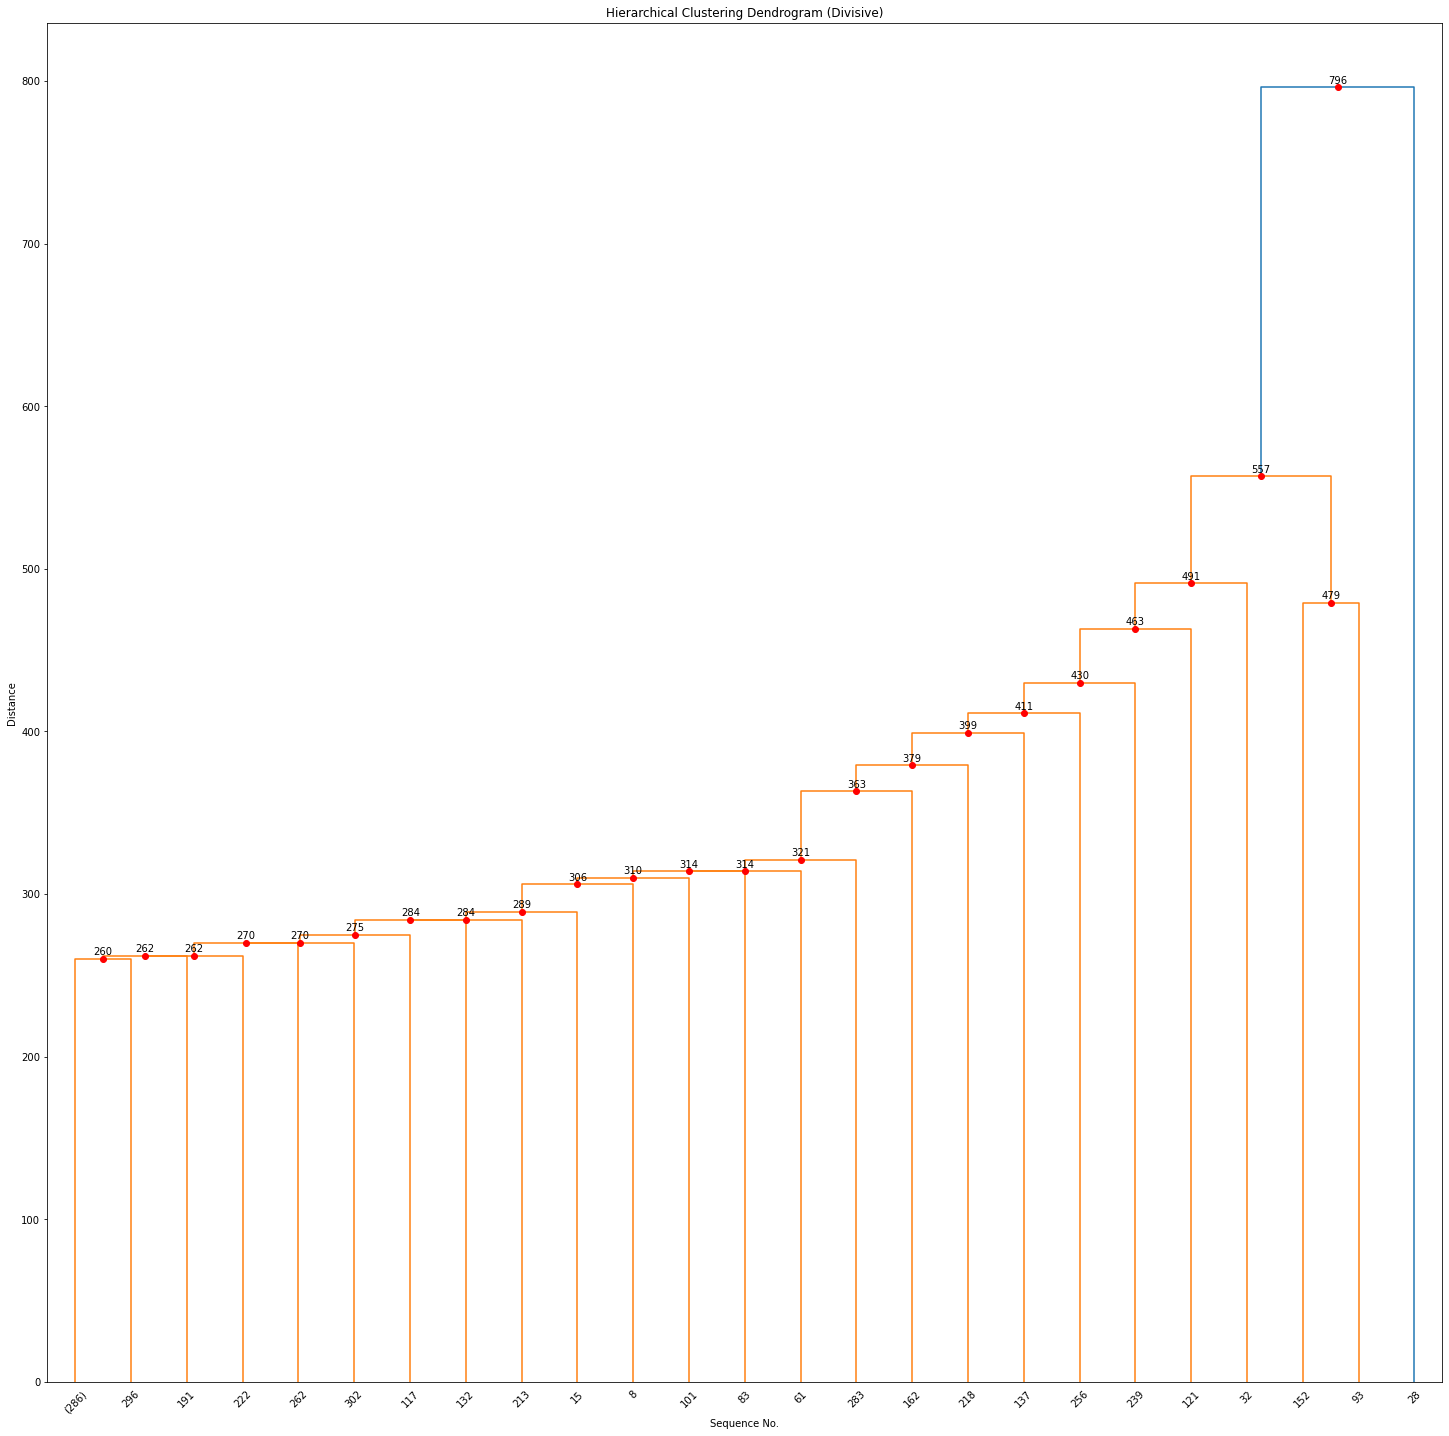

In [26]:
size=len(a)
g=(size-1)*2
parents={}
final=[]
clusters=[]
indices=[]
clus_s=[]
d=[]
Z=np.zeros(shape=(size-1,4))
p=[]
q=[]
ans=[]
for i in range(0,len(a)):
    indices.append(i)

for i in range(0,size):
    list=[]
    list.append(i)
    parents[i]=list

start=time.time()
recursive(a,indices,p,q,clusters,g)
print("Clustering done\t" + str(time.time()-start))
for i in range(0,len(d)):
    Z[size-i-2][2]=d[i]
    Z[size-i-2][3]=clus_s[i]

for i in range(len(final)-1,0,-1):
    for j in range(0,len(final[i-1])):
        if final[i-1][j] not in final[i]:
            ans.append(final[i-1][j])

ans.append(indices)
for i in range(0,len(ans)):
    if(len(ans[i])<=2):
        Z[i][0]=ans[i][0]
        Z[i][1]=ans[i][1]
    else:
        s=0
        add=[]
        common=[]
        for j in range(len(ans)-1,-1,-1):
            if(set(ans[j])<set(ans[i])):
                common=ans[j]
                break;
        x=(subtract(ans[i],common))
        for key in parents.keys():
            if(parents[key]==common):
                Z[i][0]=key
                break;
        for key in parents.keys():
            if(set(parents[key])==set(x)):
                Z[i][1]=key
                s=1
                break;
        if(s==0):
            print(Z[i][0],Z[i][1],x)
names=[i for i in range(0,size)]
plt.figure(figsize=(25, 25))
plt.title('Hierarchical Clustering Dendrogram (Divisive)')
plt.xlabel('Sequence No.')
plt.ylabel('Distance')
augmented_dendrogram(Z,labels=names,show_leaf_counts=True,p=25,truncate_mode='lastp')
plt.show()